# Project Title:
### Diabetes Prediction using Machine Learning

# Project Scenario: 
### Create a model  to predict whether or not a person has diabetes based on various health-related attributes. 

#  Project Description:
##  Diabetes Prediction:
#### Diabetes is a chronic disease that is prevalent among people of all age groups. Detecting this disease at an early stage can help individuals take necessary precautions and adjust their lifestyle to either prevent its occurrence or manage the disease effectively for those who already have it.
#### In this project, we aim to build a basic model to predict whether a person has diabetes using the Pima Indians Diabetes Database. This dataset is commonly used in machine learning practice and contains various health-related attributes for Pima Indian women, along with a label indicating whether or not each woman developed diabetes.
#### We will employ classification algorithms and Python tools such as numpy and pandas for data manipulation. Additionally, we will utilize matplotlib and seaborn for visualizations to gain insights into the data and better understand the relationships between different attributes and the target variable.
#### By developing an accurate predictive model, we hope to contribute to early detection of diabetes and empower individuals to make informed decisions about their health and lifestyle choices.

# Steps Involved to Diabetic prediction:
#### 1) Importing Libraries
#### 2) Loading Dataset
#### 3) Exploratory Data Analysis(EDA)
#### 4) Feature Selection
#### 5) Feature Scaling
#### 6) Splitting the Dataset 
#### 7) Mechine Learning Model
##### ---Prediction using Logistic Regression
##### ---Prediction using Decision Tree Classifier 
##### ---Prediction using Random Forest Classifier
##### ---Prediction using Support Vector Classifier

## Step1-Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step2-Loading Dataset

Dataset downloaded from [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [2]:
data=pd.read_csv("C:\\Users\\hudha\\Downloads\\diabetes.csv")
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## Step3-Exploratory Data Analysis(EDA)

In [3]:
data.shape

(768, 9)

###### The dataset contains 768 rows and 9 columns

In [4]:
data.columns  # showing all features 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


######  There are 768 entries (rows) in the dataset with 7 features and an Outcome column (target variable).
######  Each column has 768 non-null entries, indicating that there are no missing values.
######  The data types of the columns are as follows:
######  Integer:  Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, and Outcome.
######  Float: BMI and DiabetesPedigreeFunction.

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.duplicated().sum()

0

#####  From above,it can be inferred that there are no duplicated rows and null values in the dataset.




In [8]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
data.describe()   #  statistical summary of numerical data

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

##### Based on the understanding of the parameters, it seems highly unlikely that glucose, blood pressure, skin thickness, insulin and BMI levels are 0. So, a copy is created.


In [10]:
df=data.copy()
features=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for i in features:
    df[i] = df[i].replace(0, df[i].mean())
    
df.head(2)


Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
0            6    148.0           72.0           35.0  79.799479  33.6   
1            1     85.0           66.0           29.0  79.799479  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

##### Creating a copy of the original dataset and replace the 0 values of the impacted columns with the mean values

In [11]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### EDA based on Target Variable

In [12]:
numerical_features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

target=['Outcome']

In [13]:
outcome_count=df["Outcome"].value_counts()
outcome_count

Outcome
0    500
1    268
Name: count, dtype: int64

0 = Non-diabetic patients
1 = diabetic patients

#### From the above a total of 268 persons have diabeties.

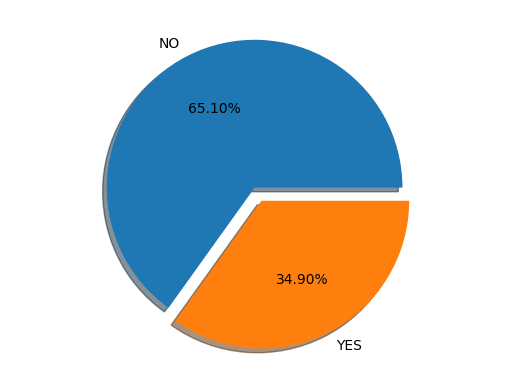

In [14]:
plt.axis("equal")
plt.pie(outcome_count,labels=["NO","YES"], shadow=True, autopct='%1.2f%%',radius=1,explode=[0.05,0.05])
plt.show()

#### The diabetic rate is 34.90%. This represents a significant percentage of individuals with diabetes, and it is important to understand why these people have the condition.

### EDA based on all numerical features

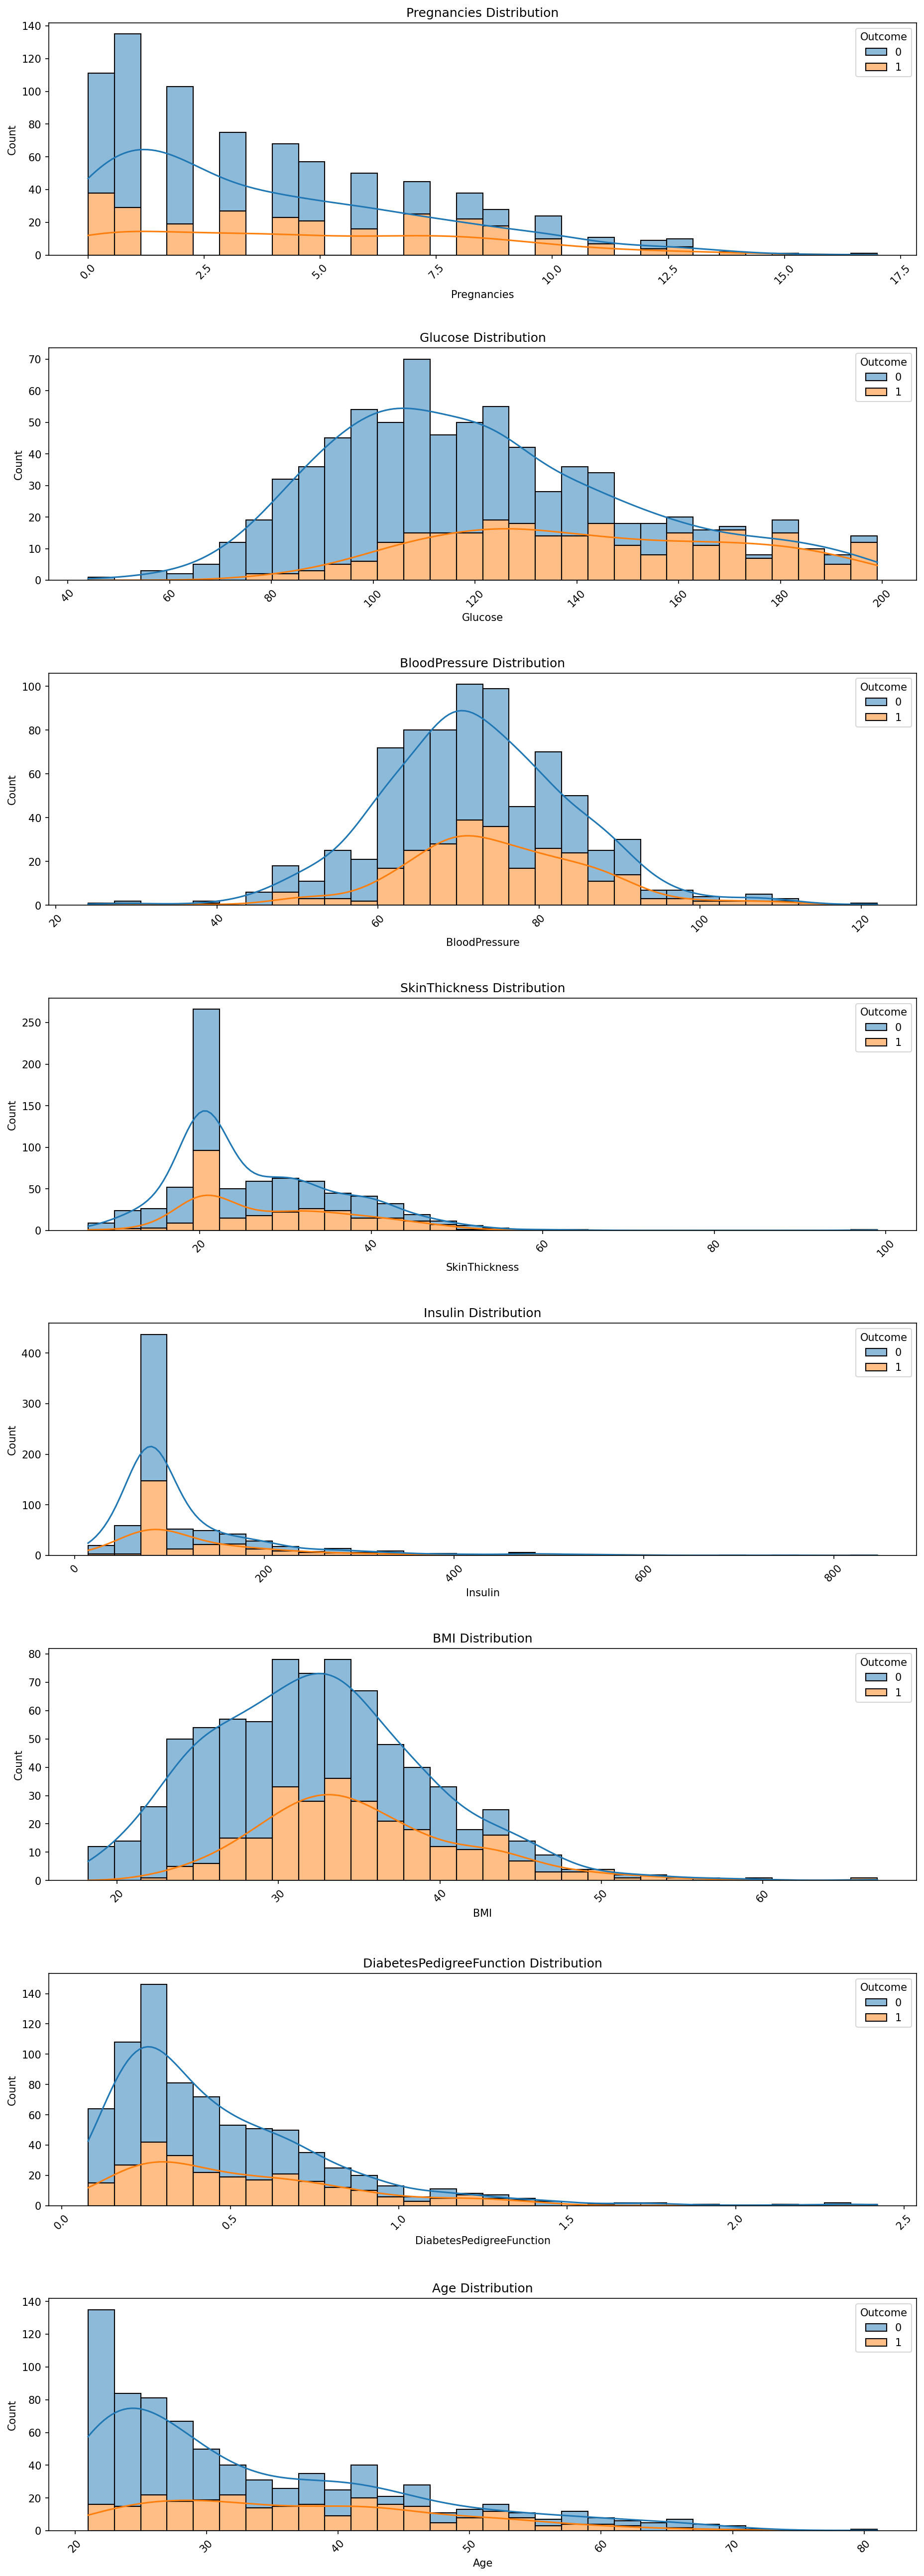

In [15]:
# Define the numerical features
numerical_features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the subplots
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(15, 5 * len(numerical_features)), dpi=150)

# Iterate through each numerical feature and create a histogram
for i, feature in enumerate(numerical_features):
    sns.histplot(ax=axes[i], data=df, x=feature, hue="Outcome", kde=True, bins=30, multiple="stack")
    axes[i].set_title(f'{feature} Distribution')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)

# Adjusting layout
plt.subplots_adjust(top=0.95, hspace=0.4)

plt.show()

#### The histograms above show that most of them appear to be positively skewed, with Glucose and Blood Pressure having the closest distribution to a normal distribution.


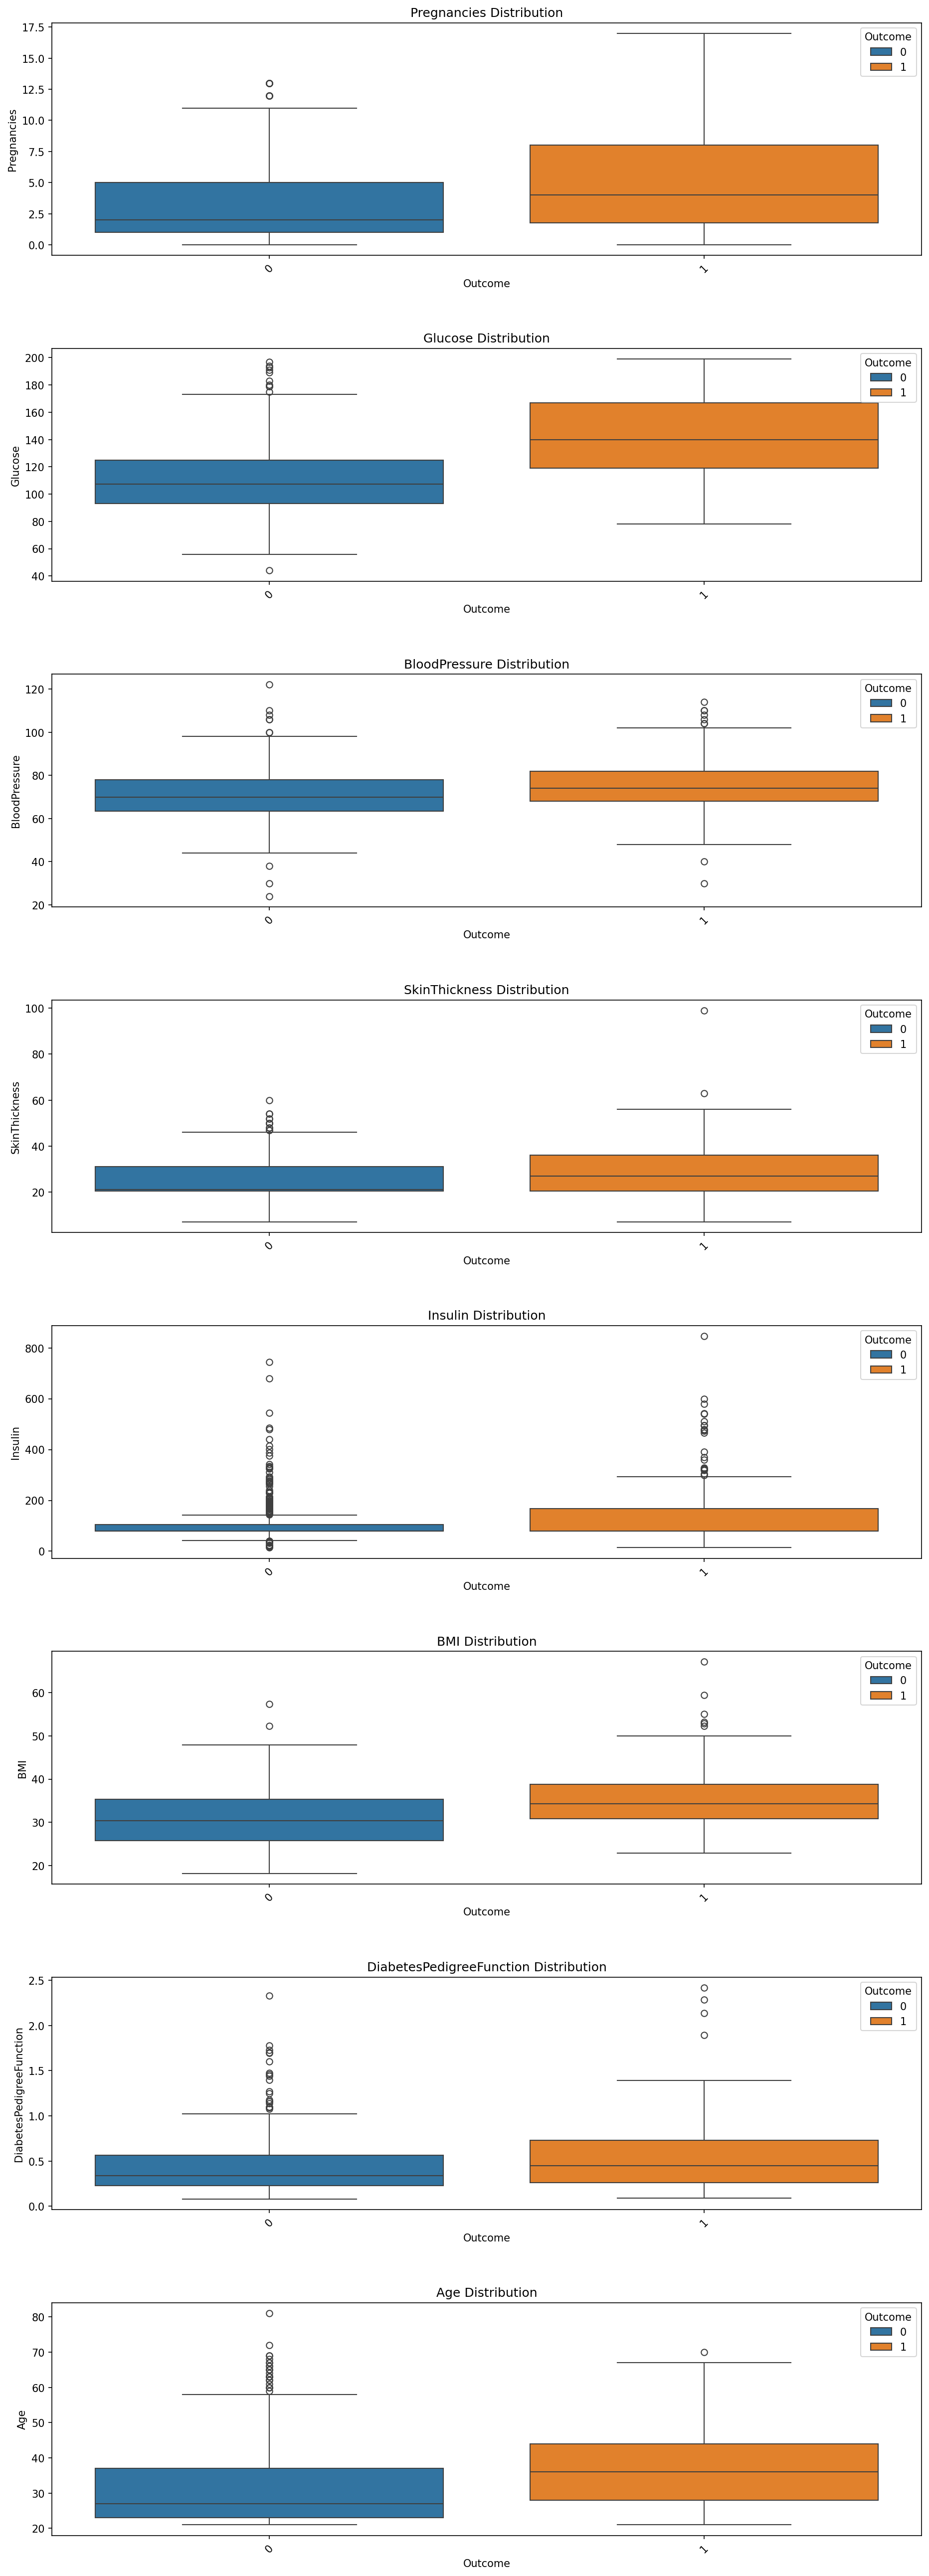

In [16]:
# Define the numerical features
numerical_features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the subplots
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(15, 5 * len(numerical_features)), dpi=150)

# Iterate through each numerical feature and create a box plot
for i, feature in enumerate(numerical_features):
    sns.boxplot(ax=axes[i], data=df, x="Outcome", y=feature ,hue="Outcome")
    axes[i].set_title(f'{feature} Distribution')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)

# Adjusting layout
plt.subplots_adjust(top=0.95, hspace=0.4)

plt.show()


#### From the boxplots, we observe that as the values of other features such as BMI, blood pressure, insulin,glucose and age increase, there is an increasing trend in the likelihood of individuals having diabetes. It suggests that these features may play a significant role in predicting the likelihood of diabetes.

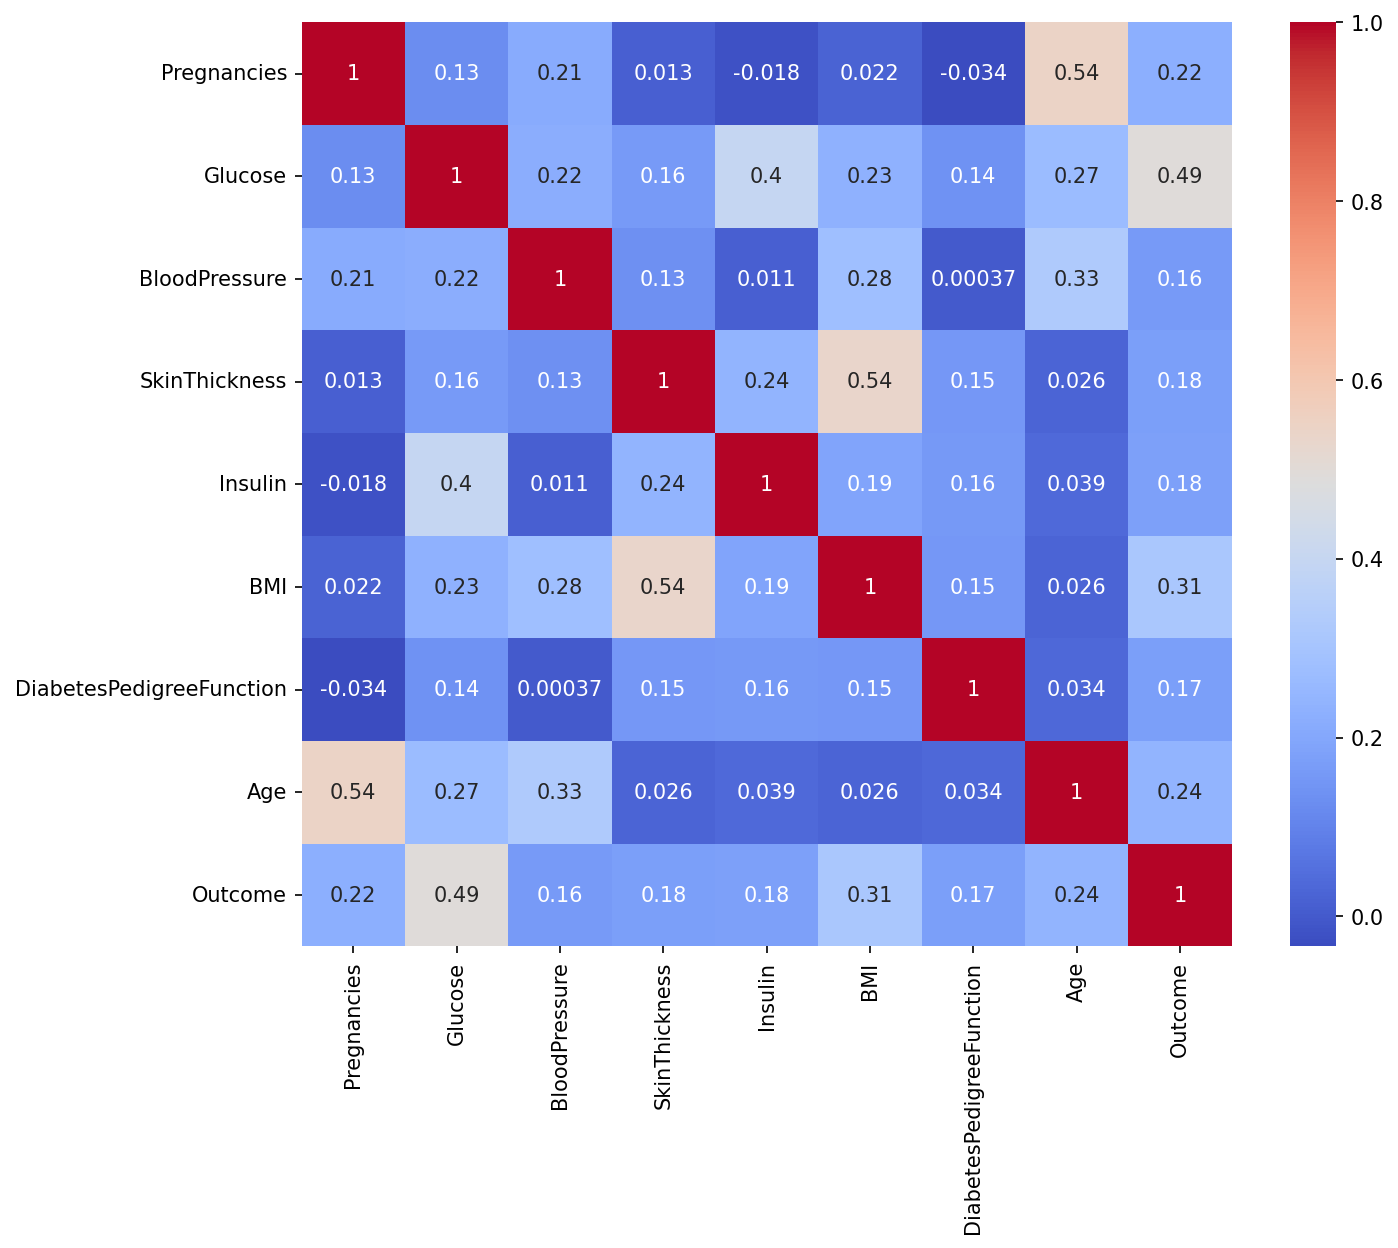

In [17]:
plt.figure(figsize=(10,8),dpi=150)
# Create correlation matrix
corr = df.corr(numeric_only=True)
# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm');
# Creating a heatmap of the correlation matrix is an excellent way to visually represent the relationships between numerical features. 

#### Features such as Glucose (0.49) and BMI (0.31) exhibit relatively strong positive correlations with the target variable "Outcome," indicating that higher values of Glucose and BMI are associated with a higher likelihood of diabetes.
#### Age also shows a moderate positive correlation (0.24) with the target variable, suggesting that older individuals are more likely to have diabetes.
#### Other features have weaker correlations with the target variable, but some still show notable correlations, such as Insulin (0.18) and SkinThickness (0.18).

#### The parameter with the highest positive correlation to each other is BMI and Skin Thickness. This is further confirmed by the SNS pair plot. The rest do not have strong multi-collinearity to each other.

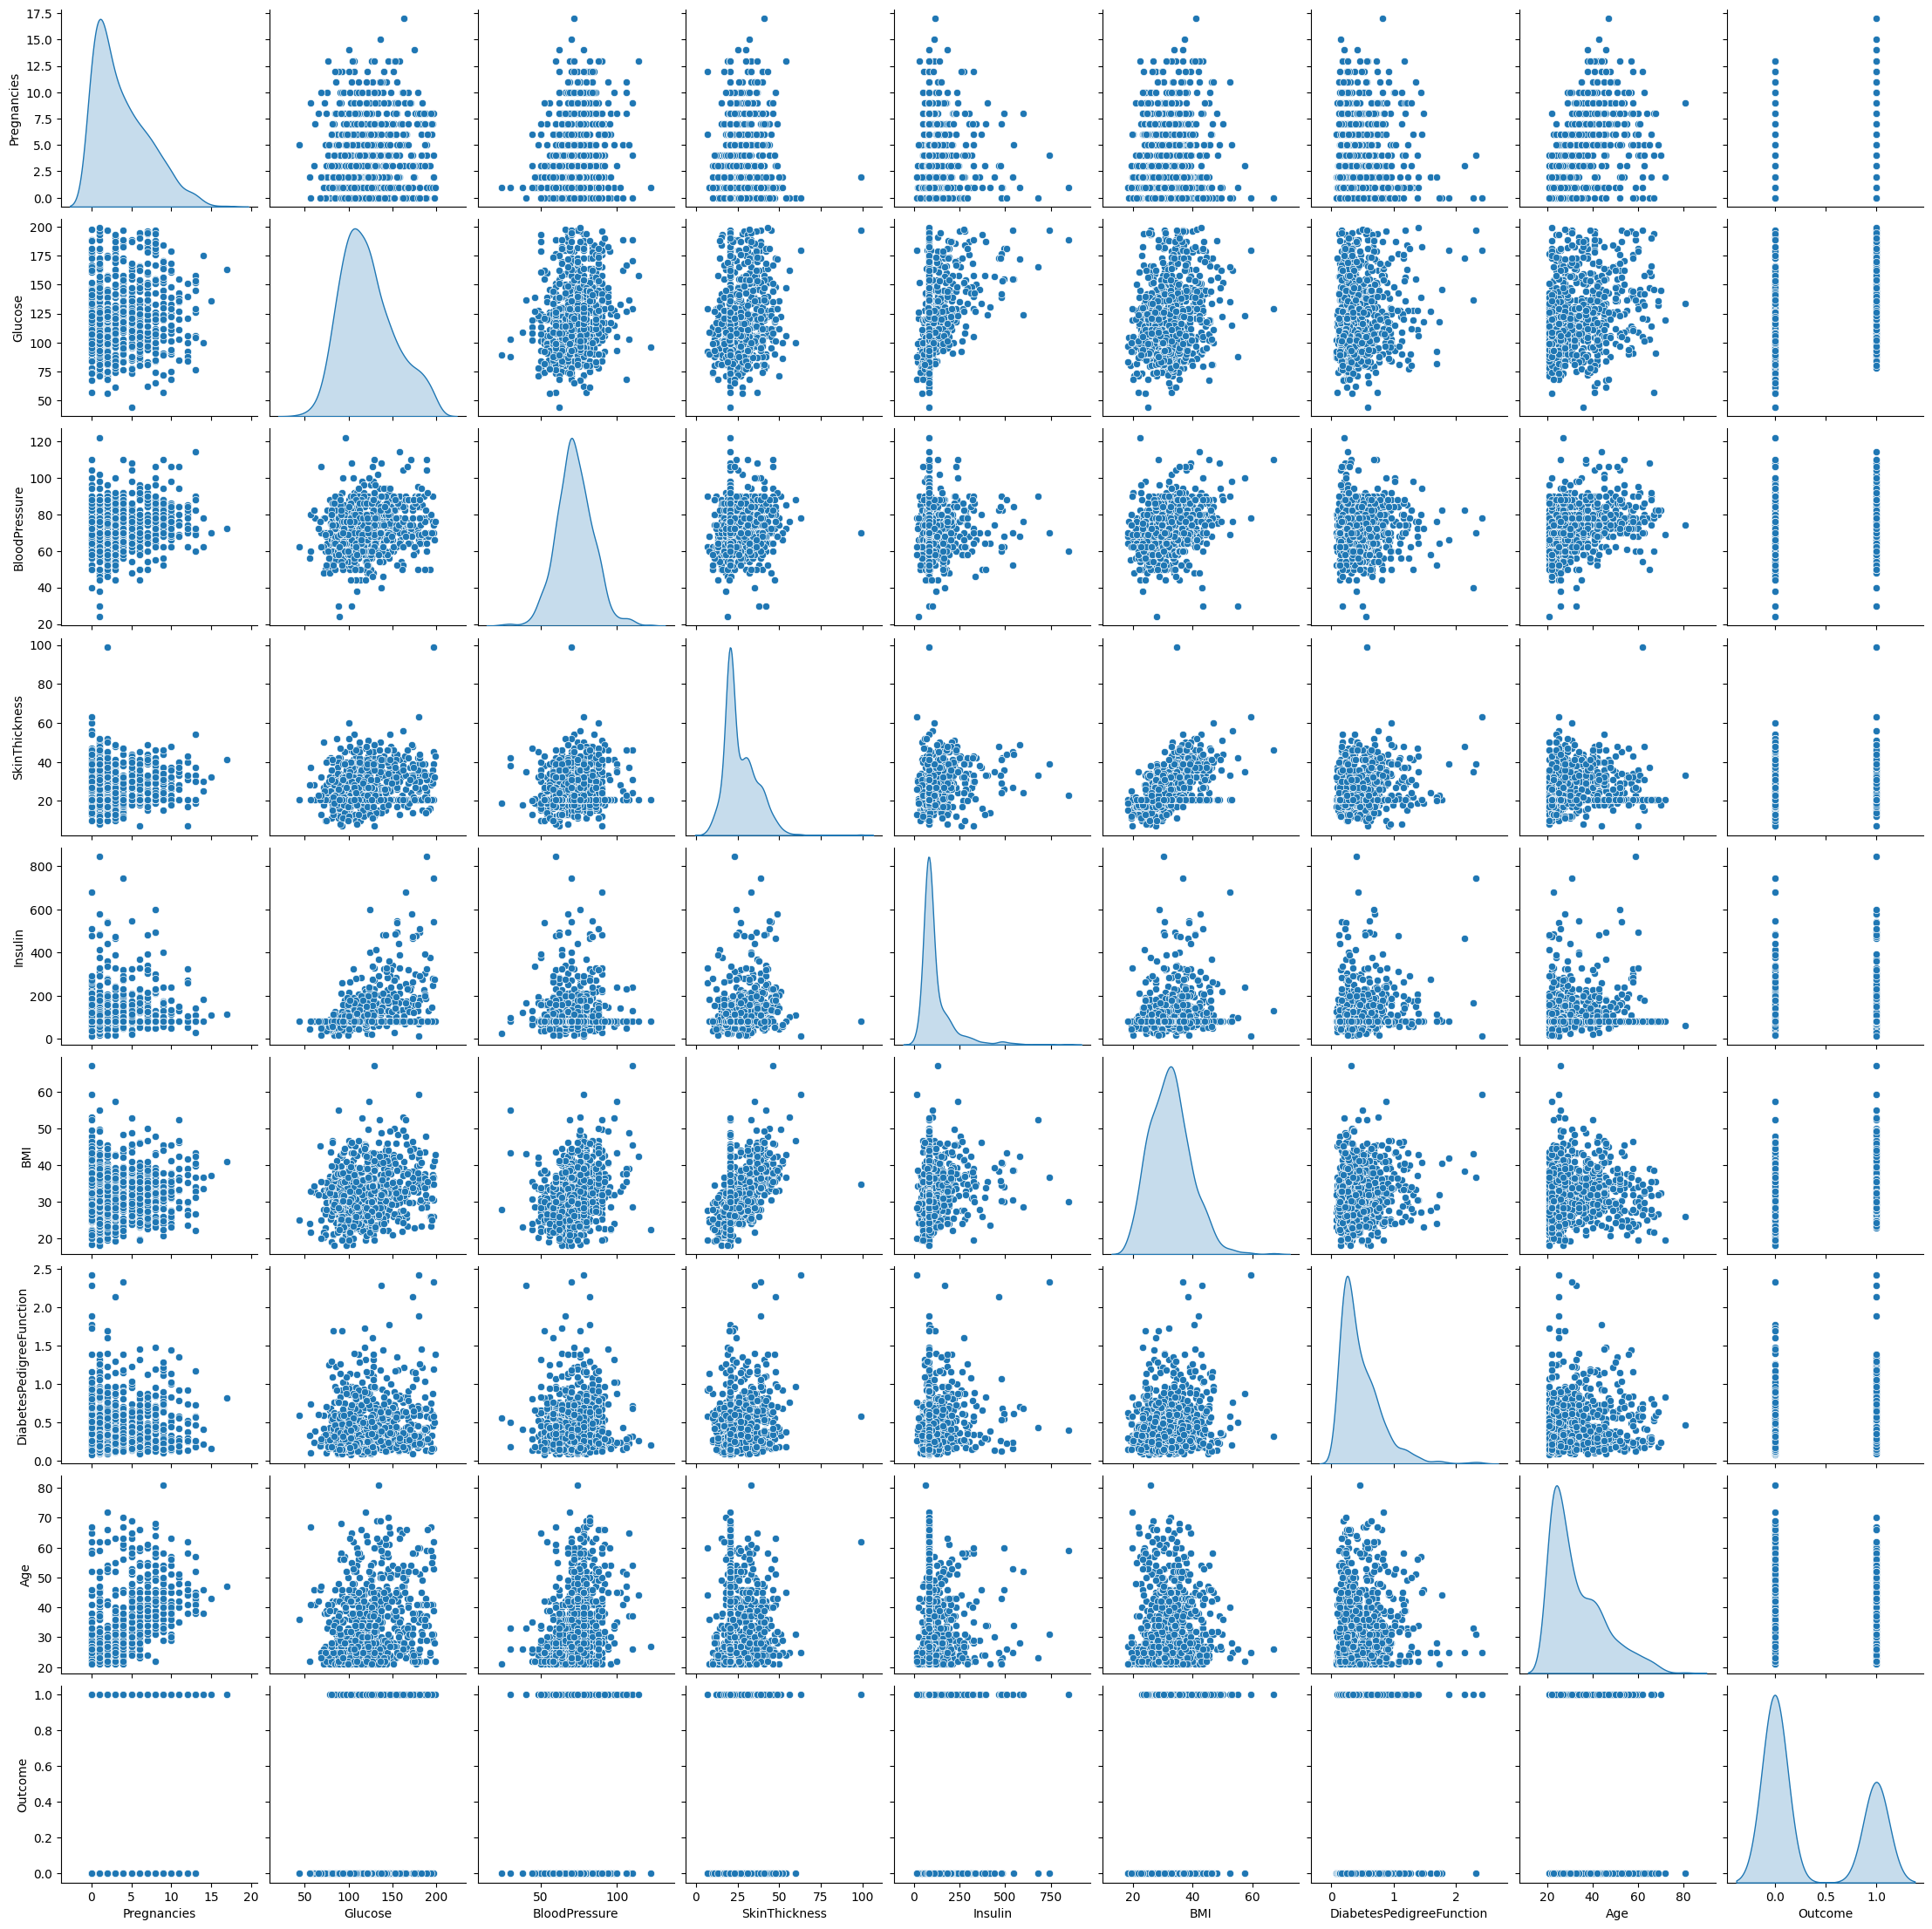

In [18]:
sns.pairplot(df,diag_kind='kde')

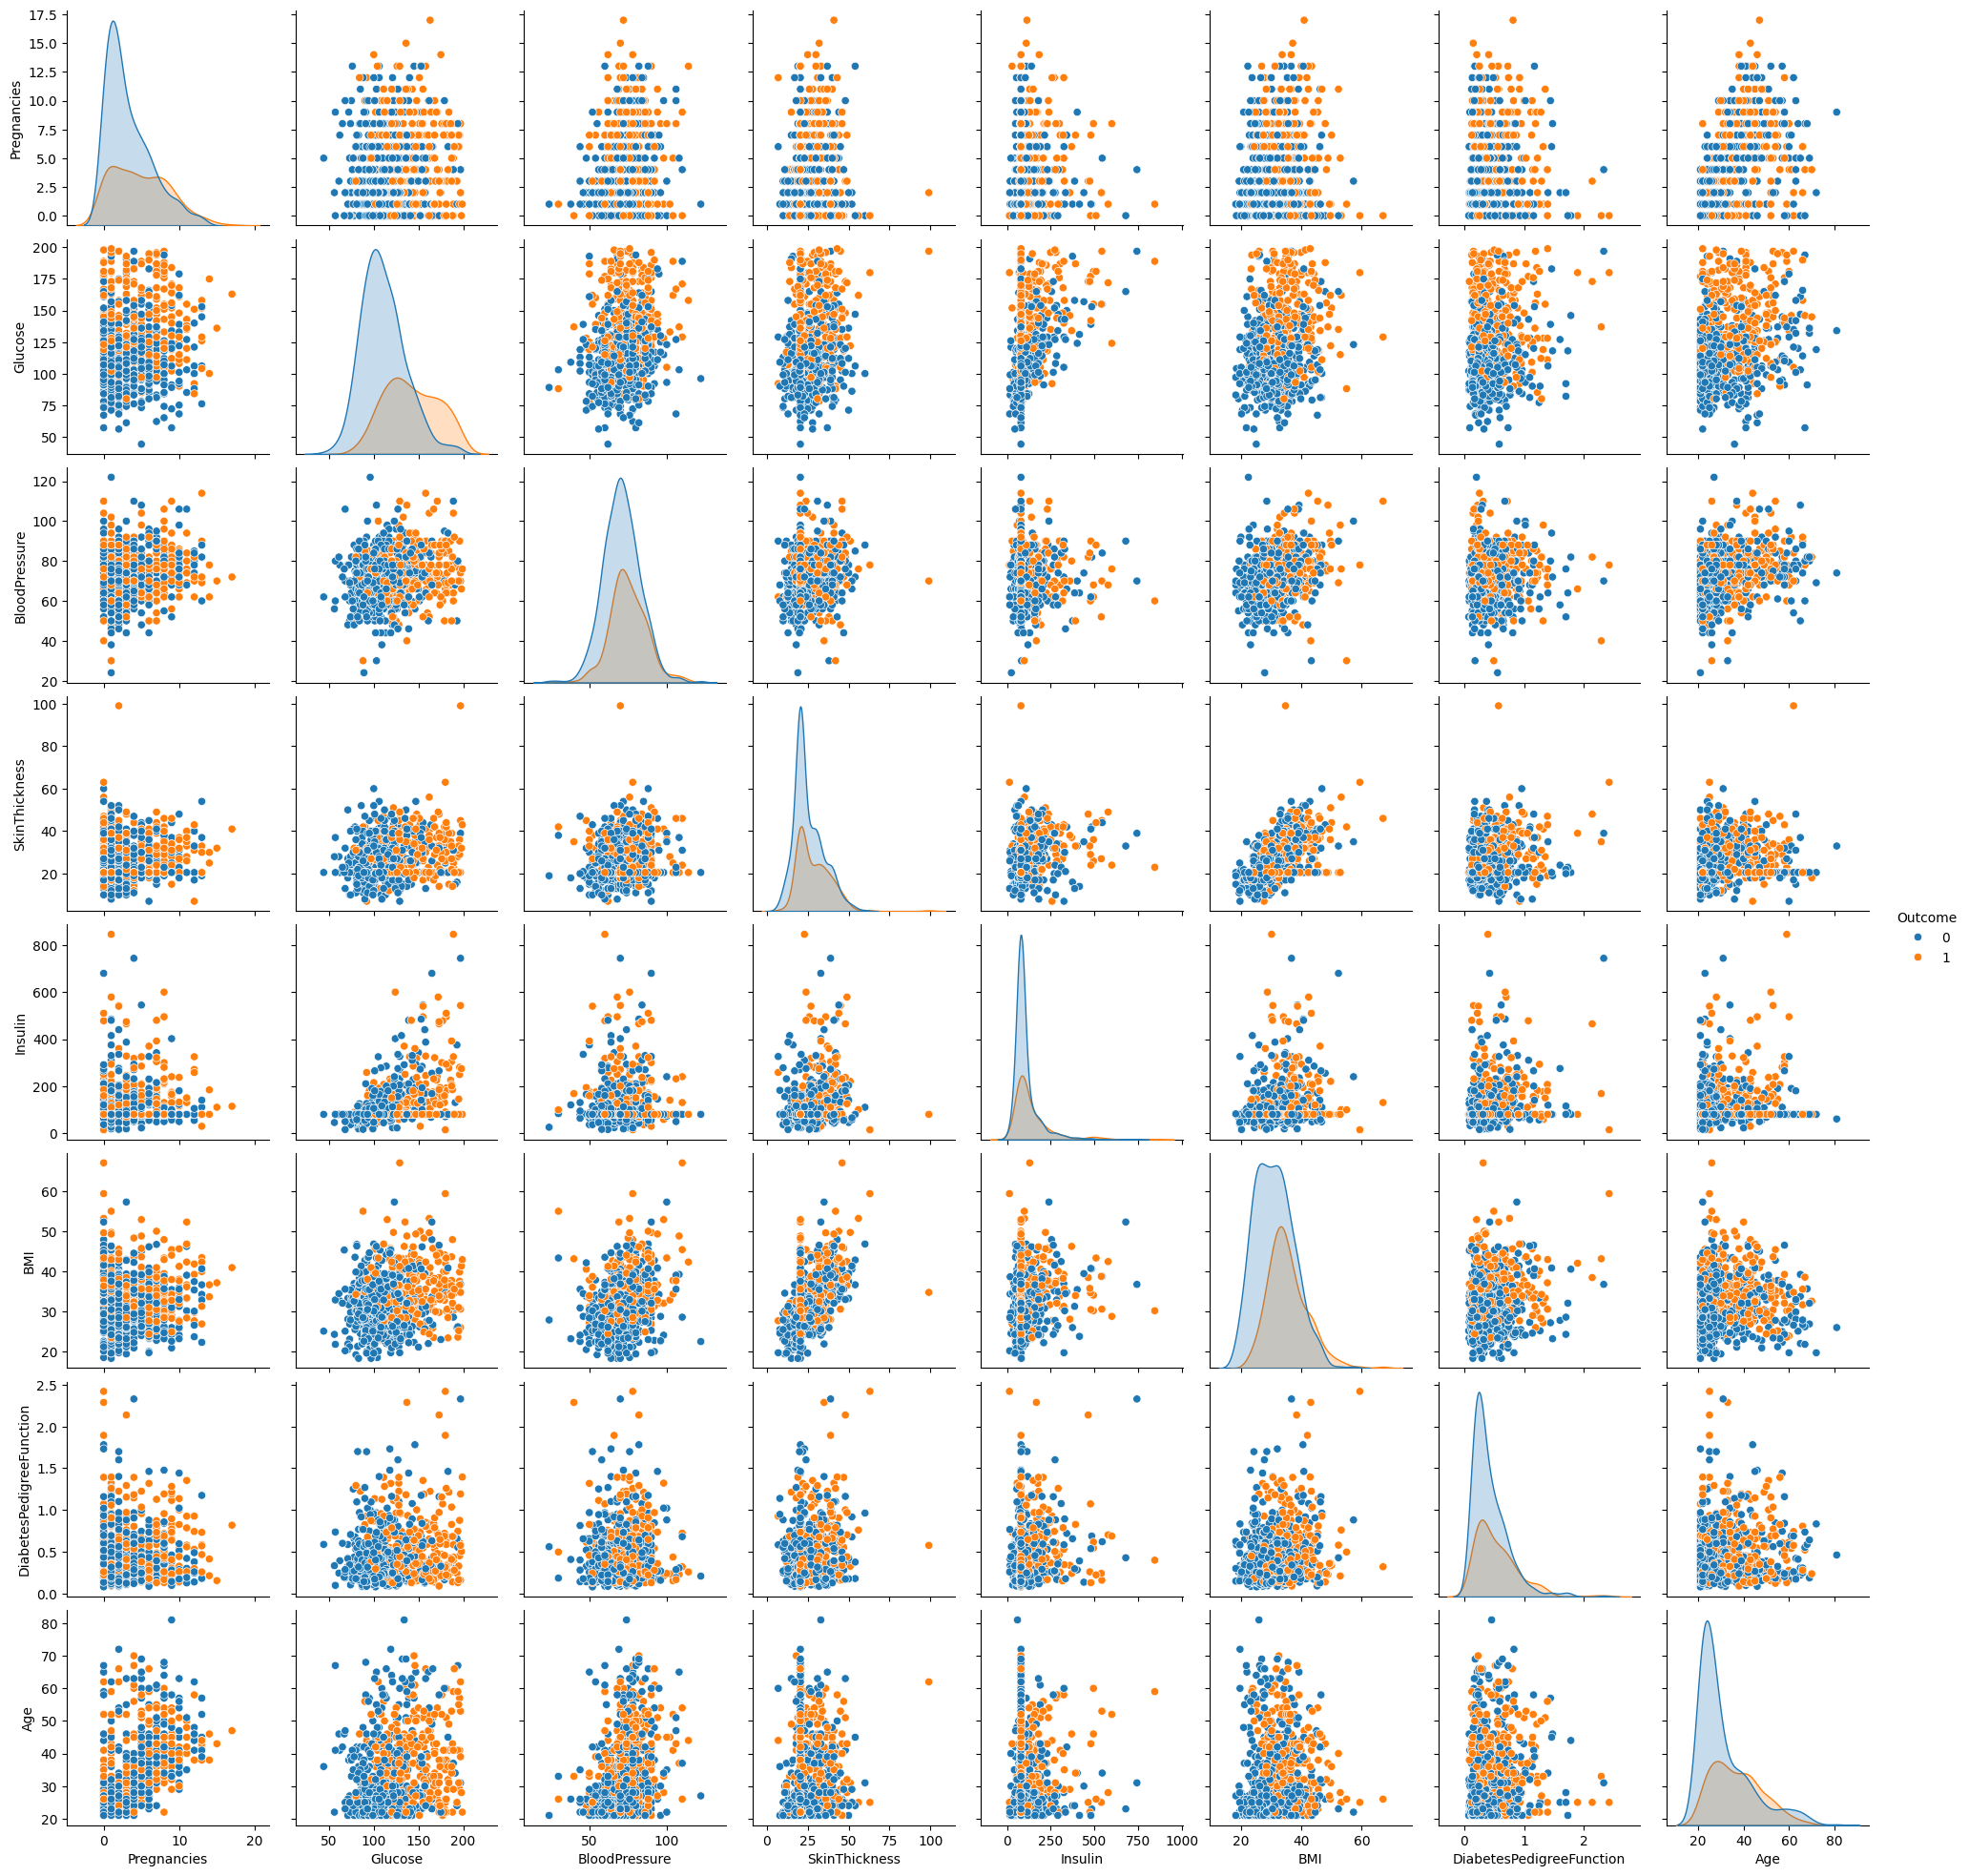

In [19]:
sns.pairplot(df,diag_kind='kde',hue="Outcome")

## Step4-Feature Selection

In [20]:
df1=df.copy()
df1.shape

(768, 9)

In [21]:
x = df1.drop(['Outcome'], axis=1)  
y = df1['Outcome']

## Step5-Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(x)

# Transform the data
scaled_data = scaler.transform(x)

# Print the scaled data
print(scaled_data)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


## Step6-Splitting the Dataset

In [23]:
from sklearn.model_selection import train_test_split

X = scaled_data
Y = df1['Outcome']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [24]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train:  (614, 8)
Shape of x_test:  (154, 8)
Shape of y_train:  (614,)
Shape of y_test: (154,)


## Step7-Mechine Learning Model

### 1)-LOGISTIC REGRESION

In [25]:
from sklearn.linear_model import LogisticRegression

#creating logistic regression model
logistic_model = LogisticRegression()

#training
logistic_model.fit(x_train, y_train)

# prediction
logistic_pred=logistic_model.predict(x_test)

logistic_model.score(x_test,y_test)

0.8181818181818182

####  Evaluate model

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic_Accuracy:", logistic_accuracy)

# Print a classification report
print(classification_report(y_test,logistic_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,logistic_pred))

Logistic_Accuracy: 0.8181818181818182
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

Confusion Matrix:
[[98  9]
 [19 28]]


### 2)-DECISION TREE

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a Decision Tree classifier
DT_model= DecisionTreeClassifier(criterion="gini")

# Fit the model to the training data
DT_model.fit(x_train, y_train)

# Make predictions on the test data
DT_pred = DT_model.predict(x_test)

DT_model.score(x_test,y_test)

0.7532467532467533

### Evaluate model

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
DT_accuracy = accuracy_score(y_test, DT_pred)
print("DT_Accuracy:", DT_accuracy)

# Print a classification report
print(classification_report(y_test,DT_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,DT_pred))

DT_Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       107
           1       0.58      0.66      0.62        47

    accuracy                           0.75       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.76      0.75      0.76       154

Confusion Matrix:
[[85 22]
 [16 31]]


### 3)-RANDOM FOREST

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=20)  # You can adjust the number of estimators as needed

# Fit the model to the training data
RF_model.fit(x_train, y_train)

# Make predictions on the test data
RF_pred = RF_model.predict(x_test)


RF_model.score(x_test,y_test)

0.7857142857142857

#### Evaluate model

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
RF_accuracy = accuracy_score(y_test, RF_pred)
print("RF_Accuracy:", RF_accuracy)

# Print a classification report
print(classification_report(y_test,RF_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,RF_pred))

RF_Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
[[92 15]
 [18 29]]


### 4)-SVC (SUPPORT VECTOR CLASSIFIER)

In [31]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC(kernel='linear')  # You can choose different kernel functions (linear, rbf, etc.)

# Fit the model to the training data
svm_model.fit(x_train, y_train)

# Make predictions on the test data
svm_pred = svm_model.predict(x_test)


svm_model.score(x_test,y_test)

0.8051948051948052

#### Evaluate model

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm_accuracy= accuracy_score(y_test, svm_pred)
print("SVM_Accuracy:", svm_accuracy)

# Print a classification report
print(classification_report(y_test,svm_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,svm_pred))

SVM_Accuracy: 0.8051948051948052
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       107
           1       0.73      0.57      0.64        47

    accuracy                           0.81       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154

Confusion Matrix:
[[97 10]
 [20 27]]


### Comparing Different Models

In [33]:
# Create a variable 
models = pd.DataFrame({'Model': ['Logistic Regression','Decission Tree','Random Forest','Support Vector Machines'],  
                      'Model Accuracy':[logistic_accuracy,DT_accuracy,RF_accuracy,svm_accuracy],
                       })

models.sort_values(by='Model Accuracy', ascending=False)

Model  Model Accuracy
0      Logistic Regression        0.818182
3  Support Vector Machines        0.805195
2            Random Forest        0.785714
1           Decission Tree        0.753247

#### According to the accuracy scores, Logistic Regression has the highest accuracy, followed by Random Forest and Support Vector Machines. Decision Tree has the lowest accuracy among the models evaluated.
#### Logistic model accuracy is 0.8182

#### For more clarification we can use cross validation technique

In [34]:
from sklearn.model_selection import cross_val_score

# Define the models
models = [
    LogisticRegression(solver='liblinear',multi_class="ovr"),
    DecisionTreeClassifier(criterion="gini"),
    RandomForestClassifier(n_estimators=40),
    SVC(kernel='linear')
]

# Perform cross-validation for each model and calculate the mean accuracy
cv_results = []
for model in models:
    scores = cross_val_score(model, X, Y, cv=5)  # 5-fold cross-validation
    cv_results.append(scores.mean())

# Create a dataframe to display the results
cv_df = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines'],
                      'Cross-Validation Accuracy': cv_results})

# Sort the dataframe by cross-validation accuracy
cv_df = cv_df.sort_values(by='Cross-Validation Accuracy', ascending=False)

# Display the results
print(cv_df)


                     Model  Cross-Validation Accuracy
0      Logistic Regression                   0.769570
3  Support Vector Machines                   0.766972
2            Random Forest                   0.761727
1            Decision Tree                   0.712367


#### Logistic Regression has the highest cross-validation accuracy among the models evaluated, followed closely by Support Vector Machines and Random Forest. Decision Tree has the lowest cross-validation accuracy.

### From the above results, we determine that the best model for prediction is the Logistic Regression model.

In [35]:
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It measures the accuracy of positive predictions. A high precision indicates that the classifier has a low false positive rate.

Recall (also called sensitivity or true positive rate): Recall is the ratio of correctly predicted positive observations to the all observations in actual class. It measures the ability of the classifier to find all positive instances. A high recall indicates that the classifier has a low false negative rate.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. It's useful when you have an uneven class distribution.

Support: Support is the number of actual occurrences of the class in the specified da

Accuracy: Accuracy is the ratio of correctly predicted observations to the total observations in the dataset. In classification, it measures the overall correctness of the model's predictions across all classes. A high accuracy indicates that the model is making correct predictions for the majority of the observations.

Macro Average: The macro average calculates the metric (such as precision, recall, or F1-score) separately for each class and then takes the average across all classes. It treats all classes equally, regardless of their support (number of instances). Each class contributes equally to the final score, making it useful when you want to evaluate the model's performance across all classes equally.

Weighted Average: The weighted average calculates the metric (such as precision, recall, or F1-score) for each class, weighted by its support (number of instances), and then takes the average across all classes. It gives more weight to classes with more instances, making it useful when you have an imbalanced dataset. Weighted average is often preferred in scenarios where classes have significantly different supportaset.

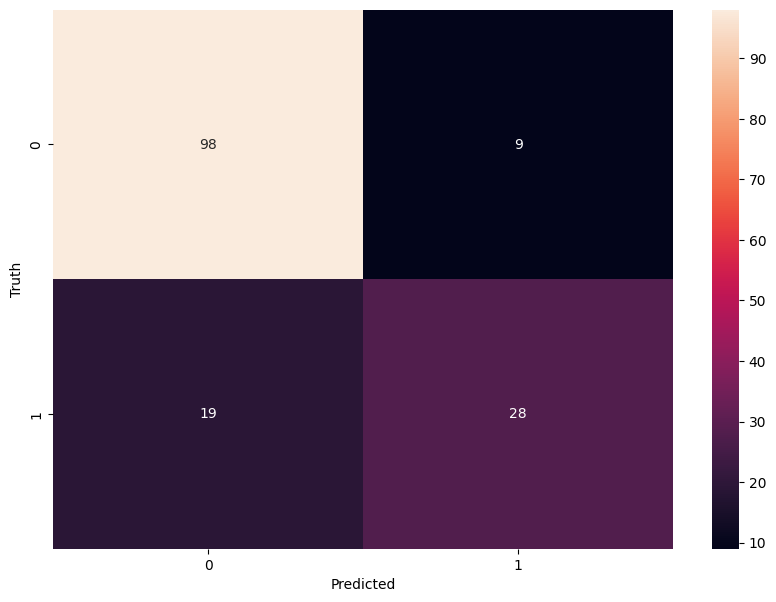

In [36]:
confusion_matrix = confusion_matrix(y_test, logistic_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True,fmt='d')    # 'd' stands for decimal format
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Conclusion:
#### From the confusion matrix we can see that: There are total 98+9=107 actual  non_diabetic patients and the algorithm predicts 98 of them as non diabetic and 9 of them as diabetic. While there are 19+28=47 actual diabetic patients and the algorithm predicts 19 of them as non-diabetic and 28 of them as diabetic.

## Prediction:

In [37]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

### sample_data 1

In [38]:
Pregnancies = int(input("No.of times Pregnancies:"))
Glucose = float(input("Glucose:"))
BloodPressure = float(input("BloodPressure:"))
SkinThickness = float(input("SkinThickness:"))
Insulin = float(input("Insulin:"))
BMI = float(input("BMI:"))
DiabetesPedigreeFunction = float(input("DiabetesPedigreeFunction:"))
Age = int(input("Age:"))

new_data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
                      BMI, DiabetesPedigreeFunction, Age]])
std_data = scaler.transform(new_data)
logistic_pred_new = logistic_model.predict(std_data)

# Mapping the prediction
print("------------------------")
if logistic_pred_new[0] == 0:
    print(logistic_pred_new, "- The person is not diabetic")
else:
    print(logistic_pred_new, "- The person is diabetic")


No.of times Pregnancies: 1
Glucose: 50
BloodPressure: 23
SkinThickness: 111
Insulin: 12
BMI: 123
DiabetesPedigreeFunction: 11
Age: 23


------------------------
[1] - The person is diabetic


### sample_data 2

In [39]:
Pregnancies = int(input("No.of times Pregnancies:"))
Glucose = float(input("Glucose:"))
BloodPressure = float(input("BloodPressure:"))
SkinThickness = float(input("SkinThickness:"))
Insulin = float(input("Insulin:"))
BMI = float(input("BMI:"))
DiabetesPedigreeFunction = float(input("DiabetesPedigreeFunction:"))
Age = int(input("Age:"))

new_data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
                      BMI, DiabetesPedigreeFunction, Age]])
std_data = scaler.transform(new_data)
logistic_pred_new = logistic_model.predict(std_data)

# Mapping the prediction
print("------------------------")
if logistic_pred_new[0] == 0:
    print(logistic_pred_new, "- The person is not diabetic")
else:
    print(logistic_pred_new, "- The person is diabetic")


No.of times Pregnancies: 6
Glucose: 148
BloodPressure: 72
SkinThickness: 35
Insulin: 0
BMI: 33.6
DiabetesPedigreeFunction: 0.627
Age: 50


------------------------
[1] - The person is diabetic


### sample_data 3

In [40]:
Pregnancies = int(input("No.of times Pregnancies:"))
Glucose = float(input("Glucose:"))
BloodPressure = float(input("BloodPressure:"))
SkinThickness = float(input("SkinThickness:"))
Insulin = float(input("Insulin:"))
BMI = float(input("BMI:"))
DiabetesPedigreeFunction = float(input("DiabetesPedigreeFunction:"))
Age = int(input("Age:"))

new_data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
                      BMI, DiabetesPedigreeFunction, Age]])
std_data = scaler.transform(new_data)
logistic_pred_new = logistic_model.predict(std_data)

# Mapping the prediction
print("------------------------")
if logistic_pred_new[0] == 0:
    print(logistic_pred_new, "- The person is not diabetic")
else:
    print(logistic_pred_new, "- The person is diabetic")


No.of times Pregnancies: 5
Glucose: 121
BloodPressure: 72
SkinThickness: 23
Insulin: 112
BMI: 26.2
DiabetesPedigreeFunction: 0.245
Age: 30


------------------------
[0] - The person is not diabetic


### sample_data 4

In [41]:
Pregnancies = int(input("No.of times Pregnancies:"))
Glucose = float(input("Glucose:"))
BloodPressure = float(input("BloodPressure:"))
SkinThickness = float(input("SkinThickness:"))
Insulin = float(input("Insulin:"))
BMI = float(input("BMI:"))
DiabetesPedigreeFunction = float(input("DiabetesPedigreeFunction:"))
Age = int(input("Age:"))

new_data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
                      BMI, DiabetesPedigreeFunction, Age]])
std_data = scaler.transform(new_data)
logistic_pred_new = logistic_model.predict(std_data)

# Mapping the prediction
print("------------------------")
if logistic_pred_new[0] == 0:
    print(logistic_pred_new, "- The person is not diabetic")
else:
    print(logistic_pred_new, "- The person is diabetic")


No.of times Pregnancies: 1
Glucose: 93
BloodPressure: 70
SkinThickness: 31
Insulin: 0
BMI: 31
DiabetesPedigreeFunction: 0.315
Age: 23


------------------------
[0] - The person is not diabetic
